# Circle Winding bias calculation for country
## Data from: https://github.com/googlecreativelab/quickdraw-dataset (Google QuickDraw!)
### Get the circle.ndjson file from: https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/raw, and save it in the same path as this notebook
## Based on: https://qz.com/994486
## Winding calculation: http://blog.element84.com/polygon-winding.html
## Install jsonlines: https://jsonlines.readthedocs.io/en/latest/

In [2]:
import numpy as np
import jsonlines
%matplotlib inline

In [164]:
count = 0
count_cl = 0 # Clockwise winding count
count_ccl = 0 # Clockwise winding count
with jsonlines.open('circle.ndjson') as reader:
    for obj in reader:
        if obj['countrycode'] == 'GB': # Insert country code - https://www.wikiwand.com/en/ISO_3166-1_alpha-2
            count = count + 1
            abc = obj['drawing'][0]
            sum = 0
            for i in range(np.shape(abc)[1]-1):
                sum = sum + (abc[0][i+1]-abc[0][i])*(abc[1][i+1]+abc[1][i])
            if sum > 0:
                count_cl = count_cl + 1
            elif sum < 0:
                count_ccl = count_ccl + 1
            #if count == 6: # If you want to visualise a particular drawing
            #    break
print count, count_cl, count_ccl

8829 7467 1298


519.289978027 117.189994812
32556.4130812


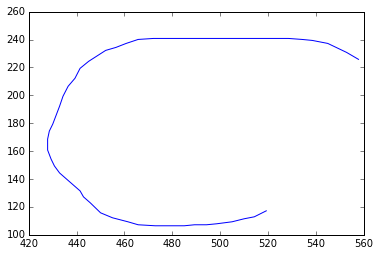

In [165]:
print abc[0][0], abc[1][0]
print sum
plot(abc[0][0:50],abc[1][0:50])

In [166]:
(1 - (count_cl+count_ccl)*1./count*1.)*100

0.7248839053120348

In [167]:
count_cl*100./count

84.57356439007815

In [168]:
count_ccl*100./count

14.701551704609809

In [169]:
count

8829